# Heart Disease Prediction

In [86]:
# Importing the librarys
import numpy as np
import pandas as pd 
import pylab as pl
import scipy.optimize as opt 
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sn

# Data Preparation

In [87]:
data = pd.read_csv('heart.csv')

In [88]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [89]:
data.sum()

age          55795.0
sex            713.0
cp             966.0
trestbps    134902.0
chol        252150.0
fbs            153.0
restecg        543.0
thalach     152842.0
exang          345.0
oldpeak       1098.3
slope         1420.0
ca             773.0
thal          2382.0
target         526.0
dtype: float64

In [90]:
data.shape

(1025, 14)

In [91]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [92]:
X = data.drop('target', axis=1)
y = data['target']

In [93]:
X.shape

(1025, 13)

In [94]:
y.shape

(1025,)

In [95]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
x_train.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
581,44,1,2,140,235,0,0,180,0,0.0,2,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
89,68,1,0,144,193,1,1,141,0,3.4,1,2,3


In [98]:
y_train.sample(3)

488    1
998    0
513    0
Name: target, dtype: int64

# Using LogisticRegression to find the Accuracy of the model : 

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
lr = LogisticRegression()

In [101]:
lr.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
y_pred = lr.predict(x_test)

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
ans = accuracy_score(y_test,y_pred)

In [105]:
print('Accuracy of the model in jaccard similarity score is = ',ans)

Accuracy of the model in jaccard similarity score is =  0.7853658536585366


In [106]:
score_lr = lr.score(x_test,y_test)

In [107]:
score_lr*100

78.53658536585367

# Applying Random Forest Classifier | Evaluation and Accuracy:

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [110]:
ans_rf = accuracy_score(y_test,y_pred)

In [111]:
print('Accuracy of the model in jaccard similarity score is = ',ans_rf)

Accuracy of the model in jaccard similarity score is =  0.7853658536585366


In [112]:
score = rf.score(x_test,y_test)

In [113]:
score*100

98.53658536585365

# Using Confusion Matrix to find the Accuracy of the model : 

In [114]:
from sklearn.metrics import confusion_matrix, classification_report

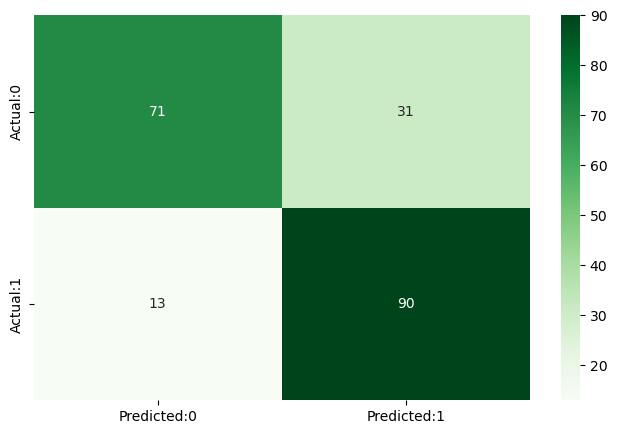

In [115]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns=['Predicted:0','Predicted:1'],
                           index=['Actual:0', 'Actual:1']
                          )
plt.figure(figsize=(8,5))
sn.heatmap(conf_matrix,annot=True,fmt='d',cmap='Greens')

plt.show()

In [116]:
ans_cm = classification_report(y_test,y_pred)

In [117]:
print('The details for confusion matrix is =')
print(ans_cm)

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



In [118]:
print("END")

END
